# TEMA1. METODOS DE PARTICIONAMIENTO

## CLUSTER POR K-MEDIAS

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import scipy.stats as stats #Para calculo de p-values, prob estadisticas
from sklearn.model_selection import train_test_split # Para particionamiento de datos
from sklearn.preprocessing import StandardScaler #Para estandarizacion
from sklearn.preprocessing import MinMaxScaler #Para normalizacion
from sklearn.metrics import euclidean_distances, silhouette_score #Para obtener valores de silueta
from sklearn.cluster import KMeans #Para utilizar el método KMeans

In [8]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

#### Primero se ejemplificará una data simulada basada en 3 clusters

In [3]:
from sklearn.datasets import make_blobs
#Creando valores simulados agrupados en 3 clusters
X,y=make_blobs(n_samples=150,#numero de registros
              n_features=2,#numero de variables
              centers=3,#numero clusters
              cluster_std=0.5, #desviacion estandar de los clusters
              shuffle=True,#realiza el proceso aleatorio
              random_state=0) #semilla

In [4]:
#Mostrando los 10 primeros registros
X[0:10]

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192]])

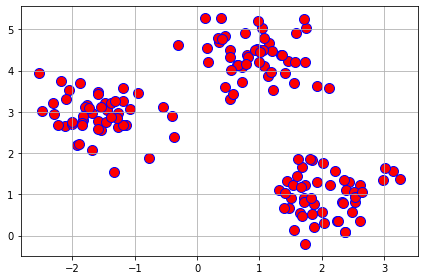

In [5]:
#Ploteando la información simulada a partir de 3 clusters
plt.scatter(X[:,0], #Elementos del eje x
            X[:,1],#Elementos del eje y
           c='red', marker='o',s=100,edgecolors='blue')
plt.grid()
plt.tight_layout() #Ajusta el diseño 
plt.show()

## Escalamiento de los datos

In [6]:
#Instanciando un objeto de clase StandardScaler
sc=StandardScaler()
X_Std=sc.fit_transform(X)

In [7]:
X_Std[0:10]

array([[ 1.32957823, -1.03136394],
       [ 0.04016184,  0.3848268 ],
       [ 0.20808655,  1.1095562 ],
       [ 0.03777276,  1.18773942],
       [ 1.33796907, -1.61978762],
       [ 0.69897786,  1.46427671],
       [ 0.79306526,  1.55481218],
       [ 1.18664455, -1.80189852],
       [-1.6106825 , -0.05528155],
       [ 0.77921537,  1.69945331]])

### K-Means 

In [8]:
#Creamos una instancia de K-Means 
km=KMeans(n_clusters=3,# numero de clusters
         init='k-means++', #centroides iniciales
         n_init=10, #numero de veces que se ejecutará el algoritmo
         tol=0.0004,#tolerancia para declarar la convergencia
         random_state=2020)#semilla

In [9]:
#Numero de clusters
km.n_clusters

3

In [10]:
#Obteniendo las etiquetas de clusters
y_km=km.fit_predict(X_Std)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

In [11]:
#Los centros de clusters
km.cluster_centers_

array([[-1.28308805,  0.11962887],
       [ 0.28936316,  1.09073236],
       [ 0.99372488, -1.21036123]])

### _Construyendo la funcion Grafico de Cluster_

In [12]:
#Librerías a utilizar
import random

#Grafico_de_cluster
def Grafico_de_cluster(X,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list):
    km = KMeans(n_clusters=n_clusters,
                    init=init, #elija k observaciones (filas) para los centroides iniciales
                    n_init=n_init, #número de veces que el algoritmo se ejecutará
                    max_iter=max_iter,#número máximo de iteraciones para una ejecución
                    tol=tol, #tolerancia para declarar convergencia
                    random_state=semilla) #semilla
    y_km = km.fit_predict(X)
    for i in range(0,km.n_clusters):
            plt.scatter(X[y_km == i, 0], #primer clúster
                        X[y_km == i, 1],
                        s=50,
                        c=name_colors_c_list[i],#El color de los puntos
                        edgecolor=name_colors_edgecolor_list[i],#El punto de colors
                        marker=name_makers_list[random.randint(0,1)],#El tipo de representación
                        label='cluster '+str(i+1))
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                    s=250, marker='*', c='red', label='centroides')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


### _Ingresando los argumentos para la funcion Grafico de Clusters_

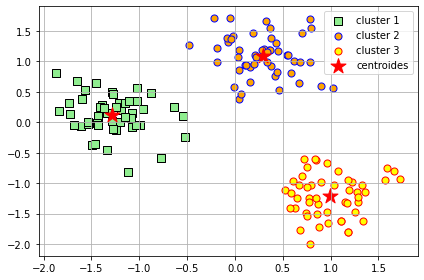

In [13]:
#Defino el numero de cluster en un array
name_colors_c_list=['lightgreen','orange','yellow']#Defino el color de los puntos
name_colors_edgecolor_list=['black','blue','red']#Defino los puntos de color
name_makers_list=['s','o','v']#Defino el tipo de representación del punto
n_clusters=3 #Se define el numero de clusters
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_cluster(X_Std,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list)

### _Obtencion del Numero Optimo de Clusters_

Nos brinda la suma de las distancias al cuadrado de las muestras de su centroide mas cercano

### _Metodo del codo(Como funcion de la distancia de intra-cluster, el codo se forma donde NO se reduce considerablemente)_

In [15]:
inercia=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             tol=0.0004,
             random_state=2020)
    km.fit(X_Std)
    inercia.append(km.inertia_)

In [16]:
inercia

[116.06524144078875,
 30.674121776362227,
 26.332543928594312,
 22.308030294855328,
 20.446925799139976,
 16.817217513716596,
 14.998565710710846,
 13.047298364772281,
 11.589401109225658]

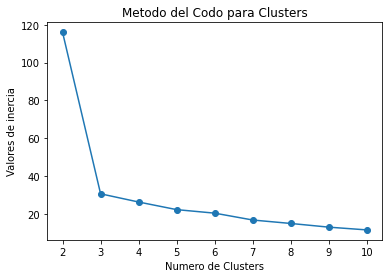

In [17]:
plt.plot(range(2,11),inercia,marker='o')
plt.title('Metodo del Codo para Clusters')
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores de inercia')
plt.show()

## METODO DE SILUTA PARA NUMERO OPTIMO DE CLUSTERS

In [28]:
silueta = [] #crear un objeto vacío tipo lista

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10,
                    random_state = 2020)
    silueta.append(silhouette_score(X_Std, #datos
                                kmeans.fit_predict(X_Std))) #etiquetas para cada observación

In [29]:
silueta

[0.5921764205499908,
 0.7138041844334488,
 0.5774583033780717,
 0.4540750604087731,
 0.4490745028501491,
 0.32683906040784516,
 0.3316202697839444,
 0.34009610381187333,
 0.35423133277996566]

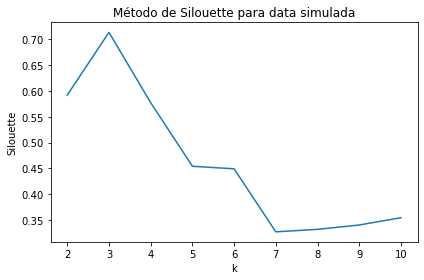

In [30]:
plt.plot(range(2, 11),
         silueta)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Método de Silouette para data simulada")
plt.tight_layout()
plt.show()

In [48]:
plt.rcParamsDefault #para visualizar los valores por defecto de matplotlib
plt.rcParams['figure.figsize']=(6.4,4.8)

**Construyendo el grafico de Silueta**

In [31]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 4)

def Grafico_de_silueta(X,n_cluster_list,init,n_init,max_iter,tol,semilla):
    cont=0
    for i in n_cluster_list:
        cont += 1
        plt.subplot(1, 4, cont)
        km = KMeans(n_clusters=i, 
                        init=init,  #elija k observaciones (filas) para los centroides iniciales
                        n_init=n_init, #número de veces que el algoritmo se ejecutará
                        max_iter=max_iter, #número máximo de iteraciones para una ejecución
                        tol=tol, #tolerancia para declarar convergencia
                        random_state=semilla) #semilla
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km) #valores de clúster
        n_clusters = cluster_labels.shape[0] #núnero de clústers
        silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #valores de silueta teniendo en cuenta la distancia euclideana

        y_ax_lower, y_ax_upper = 0, 0
        yticks = [] #objeto tipo lista vacío
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c] #valores de silueta cuando y_km toma el valor c de los posibles n de clúster
            c_silhouette_vals.sort() #se ordenan de menor a mayor los valores de silueta
            y_ax_upper += len(c_silhouette_vals) #número de valores de silueta
            color = cm.jet(float(i) / km.n_clusters) # definir el color
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                     edgecolor='none', color=color) #visualización de los valores de silueta para k
            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower += len(c_silhouette_vals)
        silhouette_avg = np.mean(silhouette_vals)#media de los valores de silueta
        plt.axvline(silhouette_avg, color="red", linestyle="--") # mostrar una línea con los valores medios de silueta
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Coeficiente de Silueta')
        plt.title("Silouette para k= " + str(km.n_clusters) + "\n" + "Coeficiente de Silueta= "+str(round((silhouette_avg),2)))
        plt.tight_layout()
        plt.show()

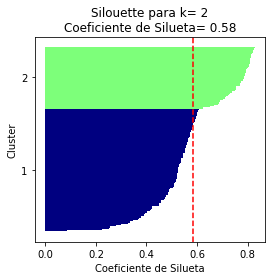

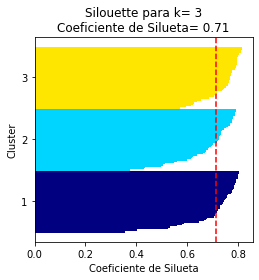

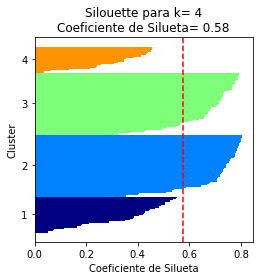

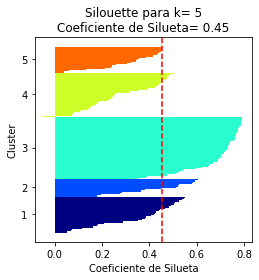

In [32]:
#Defino el numero de cluster en un array
n_cluster_list=[2,3,4,5]
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_silueta(X,n_cluster_list,init,n_init,max_iter,tol,semilla)

In [33]:
# Nos quedariamos con K=3 por mayor coeficiente de silueta

## CASO UBER

In [34]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [38]:
miArchivo='uber-raw-data-apr14.csv'
data=pd.read_csv(miArchivo)

In [39]:
#Informacion de las variables del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [40]:
#Tamaño del dataframe
data.shape

(564516, 4)

In [41]:
#Mostrando la cabecera de los datos
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [42]:
data.drop(["Date/Time","Base"],axis=1, inplace=True)

**Escalamiento de los Datos**

In [43]:
X=data
cols=X.columns
mms=MinMaxScaler()
X_mms=mms.fit_transform(X)

In [44]:
X=pd.DataFrame(X_mms,columns=cols)
X.head()

,Lat,Lon
0,0.340608,0.302361
1,0.319910,0.272952
2,0.322308,0.290391
3,0.335617,0.293974
4,0.335910,0.295969


### Numero optimo de cluster con el Metodo del Codo

In [46]:
inercia=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             tol=0.0004,
             random_state=2020)
    km.fit(X_mms)
    inercia.append(km.inertia_)

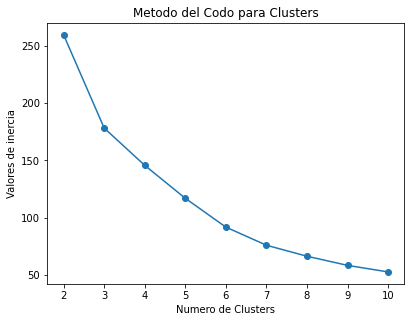

In [49]:
plt.plot(range(2,11),inercia,marker='o')
plt.title('Metodo del Codo para Clusters')
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores de inercia')
plt.show()

In [ ]:
#Clusters preferibles = 3

## K-Means (Nro Optimo de k=3)

In [52]:
km=KMeans(n_clusters=3,
         init='k-means++',
         n_init=10,
         max_iter=300,
         tol=0.0001,
         random_state=2020)

In [53]:
y_kmeans=km.fit_predict(X_mms)
y_kmeans

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
km.cluster_centers_

array([[0.31715486, 0.28737899],
       [0.33976451, 0.29772993],
       [0.29186574, 0.3672821 ]])

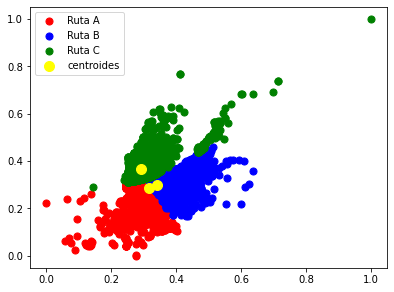

In [58]:
plt.scatter(X_mms[y_kmeans==0,0],X_mms[y_kmeans==0,1],s=50,c="red",label="Ruta A")
plt.scatter(X_mms[y_kmeans==1,0],X_mms[y_kmeans==1,1],s=50,c="blue",label="Ruta B")
plt.scatter(X_mms[y_kmeans==2,0],X_mms[y_kmeans==2,1],s=50,c="green",label="Ruta C")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c="yellow", label="centroides")
plt.legend()
plt.show()

In [59]:
y_kmeans=pd.DataFrame(y_kmeans,columns=["cluster_label"])
y_kmeans.head()

,cluster_label
0,1
1,0
2,0
3,1
4,1


In [63]:
#Adicionando las etiquetas a mi data original
miArchivo='uber-raw-data-apr14.csv'
data=pd.read_csv(miArchivo)

datafinal=pd.concat([data,y_kmeans],axis=1)
datafinal.head()

,Date/Time,Lat,Lon,Base,cluster_label
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1


## CASO: Segmentación de Clientes

In [10]:
#Importando nuestro archivo de trabajo
miarchivo="Mall_Customers.csv"
data=pd.read_csv(miarchivo)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
#Mostrando la cabecera de los datos
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#Estableciendo nuestra matriz de datos X
x=data.iloc[:,[3,4]].values

In [13]:
#Escalamiento de nuestra matriz de datos X
mms=MinMaxScaler()
x_mms=mms.fit_transform(x)

## Hallamos número optimo de cluster con el metodo silueta

In [14]:
silueta=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             tol=0.0004,
             random_state=2020)
    silueta.append(silhouette_score(x_mms,km.fit_predict(x_mms)))

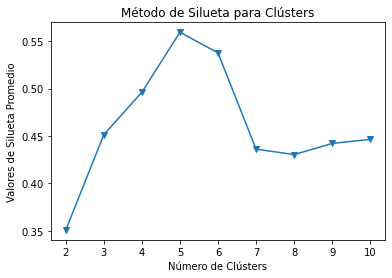

In [15]:
#Visualzando los valores de Silueta
plt.plot(range(2,11),
        silueta,
        marker='v')
plt.title('Método de Silueta para Clústers')
plt.ylabel('Valores de Silueta Promedio')
plt.xlabel('Número de Clústers')
plt.show()

In [16]:
km=KMeans(n_clusters=5,
         init='k-means++',
         n_init=10,
         max_iter=300,
         tol=0.0001,
         random_state=0)
y_kmeans=km.fit_predict(x_mms)

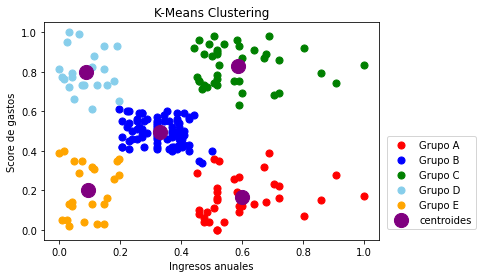

In [18]:
plt.scatter(x_mms[y_kmeans==0,0],x_mms[y_kmeans==0,1],s=50,c="red",label="Grupo A")
plt.scatter(x_mms[y_kmeans==1,0],x_mms[y_kmeans==1,1],s=50,c="blue",label="Grupo B")
plt.scatter(x_mms[y_kmeans==2,0],x_mms[y_kmeans==2,1],s=50,c="green",label="Grupo C")
plt.scatter(x_mms[y_kmeans==3,0],x_mms[y_kmeans==3,1],s=50,c="skyblue",label="Grupo D")
plt.scatter(x_mms[y_kmeans==4,0],x_mms[y_kmeans==4,1],s=50,c="orange",label="Grupo E")


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,c="purple", label="centroides")
plt.title('K-Means Clustering')
plt.xlabel('Ingresos anuales')
plt.ylabel('Score de gastos')
plt.legend(bbox_to_anchor=(1.01,0.5),loc=2)
plt.show()

**Perfilamiento**

In [19]:
y_kmeans=pd.DataFrame(y_kmeans,columns=['cluster_label'])
y_kmeans.head()

,cluster_label
0,4
1,3
2,4
3,3
4,4


In [20]:
x_df=pd.DataFrame(x,columns=['Annual Income (k$)','Spending Score (1-100)'])
x_df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
datafinal=pd.concat([x_df,y_kmeans],axis=1)
datafinal.head()

,Annual Income (k$),Spending Score (1-100),cluster_label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [22]:
#Trabajando la media por clusters
cluster_means=datafinal.groupby(['cluster_label']).mean().round(1)
cluster_means

,Annual Income (k$),Spending Score (1-100)
cluster_label,,
0,88.2,17.1
1,55.3,49.5
2,86.5,82.1
3,25.7,79.4
4,26.3,20.9


# CLARANS

In [1]:
#pip install pyclustering

In [5]:
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall

In [9]:
miarchivo="democracias_latam.sav"
df=pd.read_spss(miarchivo)

In [23]:
df.head(10)

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71
2,Democracia debil,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41
5,Democracia debil,Chile,30.0,7.89,9.58,8.93,5.00,6.25,9.71
6,Democracia debil,Colombia,67.0,6.40,9.17,4.36,5.00,4.38,9.12
7,Democracia debil,Dom Rep,74.0,6.13,9.17,4.29,3.33,5.63,8.24
8,Democracia debil,El Salvador,70.0,6.22,9.17,5.43,3.89,4.38,8.24
9,Democracia debil,Guatemala,77.0,6.07,8.75,6.79,2.78,4.38,7.65


In [24]:
#Estableciendo nuestra matriz de datos
X=df.iloc[:,4:].values

In [25]:
mms=MinMaxScaler()
X_mms=mms.fit_transform(X)

In [26]:
#Estableciendo una semilla e instanciando un objeto de la clase clarans
np.random.seed(2020)#semilla
clarans_instance=clarans(X_mms, #data
                         3, #numero de cluster
                        30, #iteraciones
                        4) #vecinos

In [27]:
#Llamar al metodo de clarans para implementar el algoritmo por detrás
np.random.seed(2020)#semilla
(time,result)=timedcall(clarans_instance.process)

In [29]:
#Obtener las observaciones pertenecientes a los clusters obtenidos por clarans
np.random.seed(2020)
clusters=clarans_instance.get_clusters()
clusters

[[0, 1, 4, 5], [3, 7, 8, 9, 10, 13, 15, 16, 18, 19], [2, 6, 11, 12, 14, 17]]

In [30]:
#Obteniendo los medoides
clarans_instance.get_medoids()

[5, 3, 2]

In [31]:
#Obteniendo el primer cluster
clusters[0]

[0, 1, 4, 5]

In [32]:
#Obteniendo el segundo cluster
clusters[1]

[3, 7, 8, 9, 10, 13, 15, 16, 18, 19]

In [33]:
#Obteniendo el tercer cluster
clusters[2]

[2, 6, 11, 12, 14, 17]

In [36]:
#Creo un Dataframe vacio
df_x=pd.DataFrame({},columns=[])
#Para cada cluster voy a colocar los valores del cluster en una nueva columna Llamada cluster
for i in range(0,len(clusters)):
    df['cluster']=None
    dfb=df.loc[clusters[i],]
    dfb.cluster=i
    df_x=pd.concat([df_x,dfb])

In [38]:
df_x.head(10)

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41,0
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71,0
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41,0
5,Democracia debil,Chile,30.0,7.89,9.58,8.93,5.00,6.25,9.71,0
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65,1
7,Democracia debil,Dom Rep,74.0,6.13,9.17,4.29,3.33,5.63,8.24,1
8,Democracia debil,El Salvador,70.0,6.22,9.17,5.43,3.89,4.38,8.24,1
9,Democracia debil,Guatemala,77.0,6.07,8.75,6.79,2.78,4.38,7.65,1
10,Democracia debil,Honduras,69.0,6.25,8.33,6.43,4.44,5.00,7.06,1
13,Democracia debil,Paraguay,71.0,6.16,7.92,5.00,5.00,4.38,8.53,1


In [39]:
#Ordenando los indices de mi df original completo
df_x=df_x.sort_index()
df_x.head(12)

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv,cluster
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41,0
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71,0
2,Democracia debil,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24,2
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65,1
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41,0
5,Democracia debil,Chile,30.0,7.89,9.58,8.93,5.00,6.25,9.71,0
6,Democracia debil,Colombia,67.0,6.40,9.17,4.36,5.00,4.38,9.12,2
7,Democracia debil,Dom Rep,74.0,6.13,9.17,4.29,3.33,5.63,8.24,1
8,Democracia debil,El Salvador,70.0,6.22,9.17,5.43,3.89,4.38,8.24,1
9,Democracia debil,Guatemala,77.0,6.07,8.75,6.79,2.78,4.38,7.65,1
